# Laboratorium 2
Autorzy: Krzysztof Zalewa 273032, Michał Pakuła 272828 \
Data: 7 Kwietnia 2025 
### Ćwiczenie 5

Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych obrazów. Program powinien umożliwiać:

1. wyświetlanie obrazu wczytanego z pliku o podanej nazwie,
2. sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej
lub pionowej o zadanej współrzędnej,
3. wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego
zapis do pliku o zadanej nazwie.

In [1]:
import matplotlib.pyplot as plt
import cv2  
import numpy as np
import os

#### Zadanie 1

In [2]:
# Załadowanie pliku .tiff
if os.name == 'nt':
    file_name = "./src/"+input("Podaj nazwe pliku z danymi: ")
elif os.name == 'posix':
    file_name = ".//src//"+input("Podaj nazwe pliku z danymi: ")
else:
    print("Nieznany system")
img = cv2.imread(file_name) 

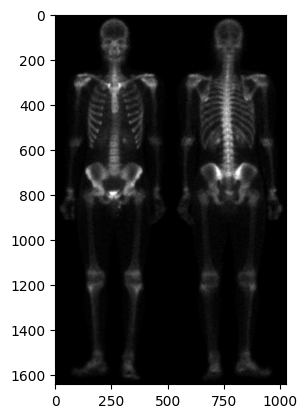

In [3]:
#Wyświetlenie załadowanego obrazu
plt.figure()
plt.imshow(img)

plt.show()

Obraz został wczytany z pliku o podanej nazwie z rozszerzeniem i wyświetlony za pomocą biblioteki matplotlib.

Skrypt działa zarówno w systemie Linux, jak i Windows - ścieżka do pliku jest automatycznie dostosowywana w zależności od wykrytego systemu operacyjnego.

#### Zadanie 2
Stworzenie histogramu obrazu

Histogram jest tworzony na podstawie jednej linii (poziomej lub pionowej) która jest wybrana przez użytkownika

Eee


NameError: name 'x' is not defined

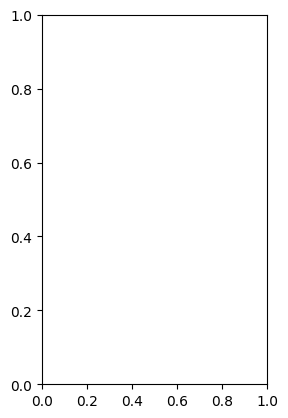

In [4]:
if len(img.shape)==3:
    img = np.mean(img,axis=2).astype(np.uint8)
mode = input("Podaj pozioma/pionowa:")

if( mode == "pozioma"):
    line_num = int(input("Podaj wysokość: "))
    gray_val = img[line_num,:]

elif(mode == "pionowa"):
    line_num = int(input("Podaj szerokość: "))
    gray_val = img[:,line_num]

else:
    print("Eee")

if(mode == "pozioma"):
    x = np.arange(img.shape[1])
    y = line_num * np.ones(img.shape[1])
elif mode == "pionowa":
    x = line_num * np.ones(img.shape[0])
    y = np.arange(img.shape[0])

plt.subplot(1, 2, 1)
plt.plot(x, y, color='red', linewidth=1)
plt.imshow(img, cmap='gray')
plt.title('Obraz w skali szarości')
plt.xlabel('Szerokość')
plt.ylabel('Wysokość')
plt.subplot(1, 2, 2)
plt.plot(gray_val)
plt.title('Histogram skali szarości')
plt.xlabel('Wartość pikseli')
plt.ylabel('Częstość')
plt.show()

Na histogramie widoczne są poziomy szarości pikseli znajdujących się na wybranej linii obrazu<br>
Oś X przedstawia pozycję piksela na tej linii, natomiast oś Y odpowiada wartości poziomu szarości (od 0 do 255).<br> 
Analizując wykres, można zauważyć rozkład jasności na tej konkretnej linii obrazu, co pozwala ocenić kontrast, obecność struktur lub jednolitość tła w tym fragmencie zdjęcia.

#### Zadanie 3
Stworzenie wycinka obrazu

Użytkownik podaje współrzędne a następnie wyznacza szrokość oraz wysokość wycinka od danego punktu

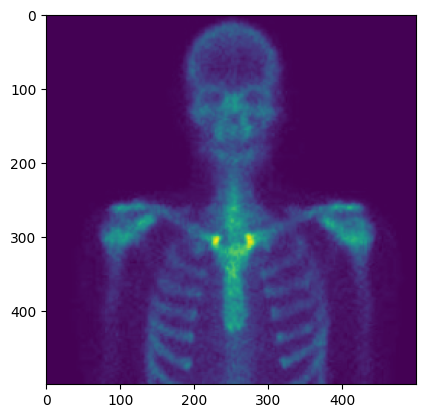

In [ ]:
try:
    x, y, w, h = map(int, input("Podaj współrzędne X, Y, szerokość i wysokość prostokąta (oddzielone spacjami): ").split())
        
    if w <= 0 or h <= 0:
        print("Szerokość i wysokość muszą być dodatnie.")
except ValueError:
        print("To nie są liczby całkowite. Proszę spróbować ponownie.")
region_of_intrest = img[y:y+h , x:x+w]

plt.figure()
plt.imshow(region_of_intrest)

plt.show()

Podane współrzędne są skrajną współrzędną w lewym górnym rogu, a następnie wycinek rozszerzany jest w stronę prawą oraz w dół dając odcinek wynikowy.